In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#checking for null values
df.isnull()

missing_values = df.isnull()

missing_count = missing_values.sum() #method to count the number of missing values in each column.
any_missing = missing_count.any() #check if any missing values exist in any column
print(missing_count)
print("Any missing values:", any_missing) # will print true if there is any missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Any missing values: False


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
X=df[[ 'Annual Income (k$)',
       'Spending Score (1-100)']]


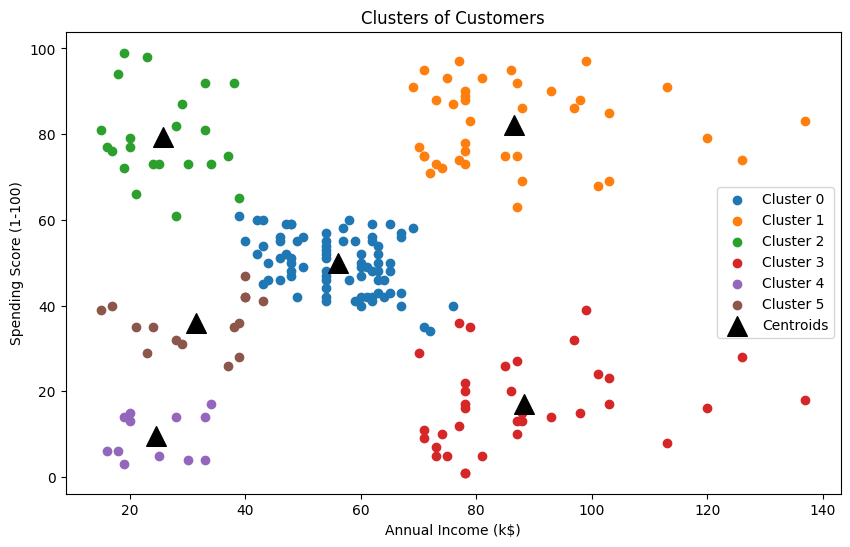

In [6]:
k=6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


#plotting
plt.figure(figsize=(10, 6))
for cluster in range(k): # Iterate over each cluster
    cluster_data = df[kmeans.labels_ == cluster]  # Filter data points for the current cluster
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='^', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
